In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/SummerAcademyNPSData.csv')
df = df.rename(columns={'Rating (Num)': 'Rating', 'Schedule Pacing': 'Pacing'})

# Make School Summer Academy NSP

# Overall NSP Score
    1. How many more promoters are there than detractors?
    2. How was the program rated by location and per week?
    3. What was the average ratting per week?
    3. How was the pacing considered overall?
# Which Track Should They Focus On?
    4. Which track was the most populated?
    5. Which track had the highest rating?

# Overall Satisfaction

## How many more promoters are there than detractors?

In [2]:
df['Rating'] = df['Rating'].apply(lambda x: int(x) if x not in ['#ERROR!'] else 0)

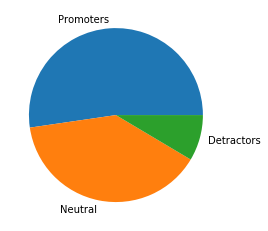

In [24]:
promoters = len(df[df['Rating'] >= 9]['Rating'])
neutral = len(df[(df['Rating'] > 6) & (df['Rating'] < 9)])
detractors = len(df[df['Rating'] <= 6]['Rating'])

plt.pie([promoters, neutral, detractors], labels=['Promoters', 'Neutral', 'Detractors'])
plt.show()

# Overall NPS Score

In [25]:
total = promoters + detractors + neutral
promoters_percent = promoters/total
detractors_percent = detractors/total
print(promoters_percent - detractors_percent)

0.4377150722642808


## What was the rating of the program overall?

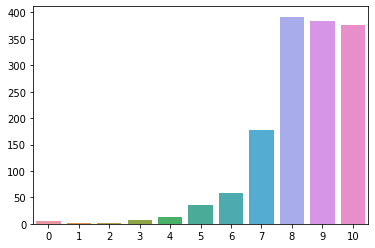

In [5]:
totaled_ratings = []
ratings = list(df['Rating'].dropna().sort_values().unique())
for rating in ratings:
    totaled_ratings.append(len(df[df['Rating'] == rating]))
sns.barplot(ratings, totaled_ratings)

## What was the pacing of the program ratted overall?

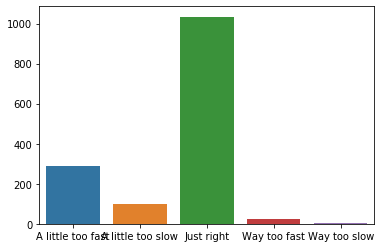

In [6]:
totaled_pacings = []
pacings = list(df['Pacing'].dropna().sort_values().unique())
for pacing in pacings:
    totaled_pacings.append(len(df[df['Pacing'] == pacing]))
sns.barplot(pacings, totaled_pacings)

## How did the program's overall pacing and rating change by location and per week?

In [7]:
pacing_value = {'Way too slow': 0, 'Way too fast': 0, 'Just right': 2, 'A little too slow': 1, 'A little too fast': 1}
df['Pacing'] = df['Pacing'].dropna().apply(lambda x: pacing_value[x])

In [8]:
pivited_location = pd.pivot_table(df, index='Location', columns='Week', values='Rating', aggfunc=np.sum)
pivited_location = pivited_location.fillna(0)

pivited_pacing = pd.pivot_table(df, index='Location', columns='Week', values='Pacing', aggfunc=np.sum)
pivited_pacing = pivited_pacing.fillna(0)

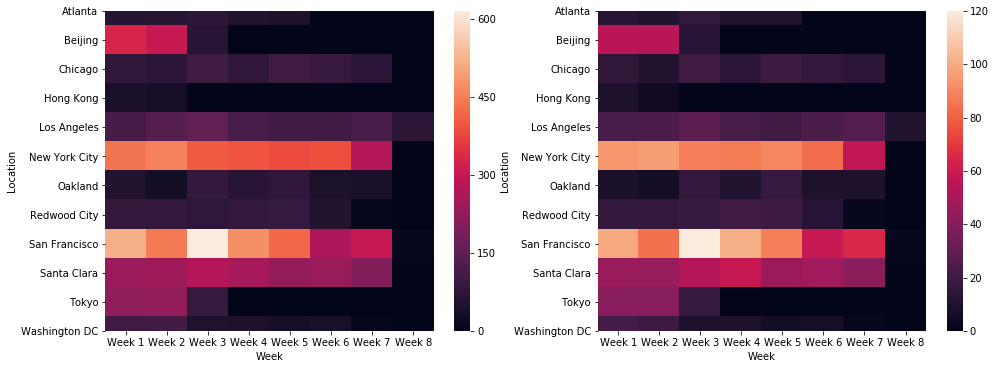

In [9]:
fig = plt.figure(figsize = (25,20)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)

sns.heatmap(pivited_location, ax=ax1)
sns.heatmap(pivited_pacing, ax=ax2)

## What was the average ratting per week?

In [10]:
averaged_ratings = []
weeks = list(df['Week'].sort_values().unique())
for i in weeks:
    if i != 'Week 8':
        averaged_ratings.append(df[df['Week'] == i]['Rating'].sum()/len(df[df['Week'] == i]['Rating']))

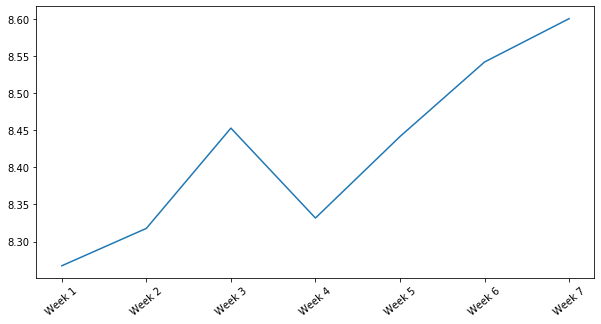

In [11]:
plt.figure(figsize=(10,5), frameon=False)
plt.xticks(rotation=40)
plt.plot(weeks[:7], averaged_ratings)

# Which Track Should They Focus On?

## Did studetns change tracks from the start to end of the program?

In [12]:
pivoted_tracks = pd.pivot_table(df, index='Track', columns='Week', values='Rating', aggfunc=lambda x: len(x))
pivoted_tracks = pivoted_tracks.fillna(0)
pivoted_tracks

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Track,,,,,,,,
Apps,183.0,176.0,142.0,105.0,101.0,88.0,72.0,4.0
"Apps, Explorer",42.0,40.0,38.0,34.0,31.0,23.0,16.0,0.0
Games,35.0,29.0,36.0,33.0,31.0,21.0,19.0,4.0
"Games, Explorer",6.0,6.0,7.0,7.0,6.0,6.0,5.0,0.0
VR,10.0,10.0,10.0,10.0,7.0,5.0,7.0,1.0


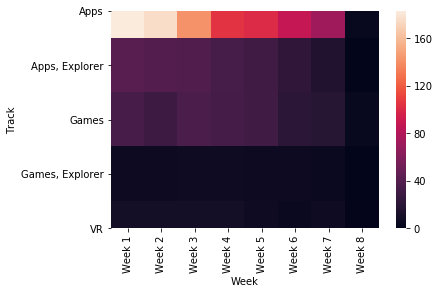

In [13]:
sns.heatmap(pivoted_tracks)

## Which track was the most populated?

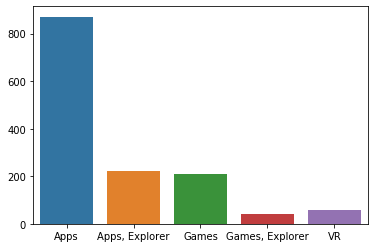

In [14]:
track_pop = []
tracks = list(df['Track'].dropna().sort_values().unique())
for track in tracks:
    track_pop.append(len(df[df['Track'] == track]))
sns.barplot(tracks, track_pop)

## Which track had the highest average rating?

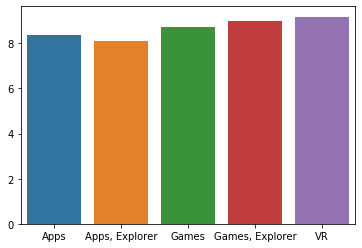

In [15]:
track_ratings = []
tracks = list(df['Track'].dropna().sort_values().unique())
for track in tracks:
    track_ratings.append((df[df['Track'] == track]['Rating'].sum())/len(df[df['Track'] == track]['Rating']))
sns.barplot(tracks, track_ratings)